# Exploration of Monte Carlo Estimator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from matplotlib import gridspec
import scipy as scipy
from scipy.integrate import quad
from scipy.stats import norm
import sympy as sympy

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Example Problem to Consider

Now let's consider the random variable $Z = h(X)$ where $h(x)$ is the composition of two transformations: $h(x) = (f \circ g)(x)$. We define $y := g(x) = \frac{\pi}{2} x$ and $z := f(y) = \tfrac{\pi}{2} \sin(y)$. Hence, $h(x) = \tfrac{\pi}{2} \sin(\tfrac{\pi}{2} x)$.

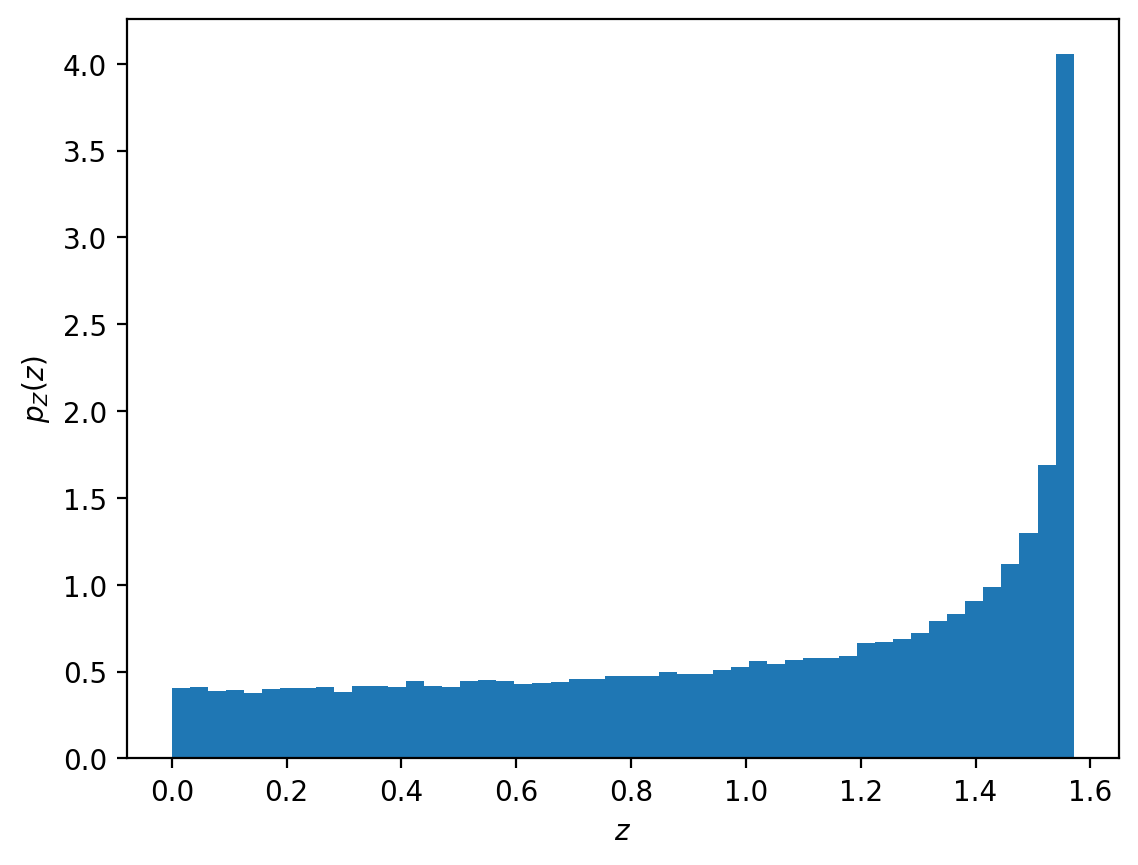

In [25]:
def h(x):
    return np.pi * 0.5 * np.sin(np.pi * x * 0.5)

X = np.random.uniform(size=100000)
Z = h(X)

plt.hist(Z, bins=50, density=True)
plt.xlabel(r'$z$')
plt.ylabel(r'$p_Z(z)$')
plt.show()

### Deriving the PDF

Lets first find the value of $h^{-1}(z)$
$$
\begin{align}
& z = \tfrac{\pi}{2} \sin(\tfrac{\pi}{2} x)\\
&\Rightarrow \tfrac{2z}{\pi} = \sin(\tfrac{\pi}{2} x)\\
&\Rightarrow \sin^{-1}(\tfrac{2z}{\pi}) = \tfrac{\pi}{2} x\\
&\Rightarrow \tfrac{2}{\pi}\sin^{-1}(\tfrac{2z}{\pi}) = x\\
&\Rightarrow h^{-1}(z) = \tfrac{2}{\pi}\sin^{-1}(\tfrac{2z}{\pi})
\end{align}
$$
Now lets find the PDF
$$
\begin{align}
p_Z(z) &= \frac{p_X(h^{-1}(z))}{\vert h'(h^{-1}(z))\vert}\\
&= \frac{p_X\left(\frac{2}{\pi}\sin^{-1}\left(\frac{2z}{\pi}\right)\right)}{\left\vert h'\left(\frac{2}{\pi}\sin^{-1}\left(\frac{2z}{\pi}\right)\right)\right\vert}\\
&= \frac{1}{\left\vert  \frac{\pi^2}{4}\cos\left(\sin^{-1}\left(\frac{2z}{\pi}\right)\right)        \right\vert}\\
&= \frac{4}{\pi^2 \left\vert \cos\left(\sin^{-1}\left(\frac{2z}{\pi}\right)\right)\right\vert}\\
&= \frac{4}{\pi^2 \sqrt{1-\left(\frac{2z}{\pi}\right)^2}} && \quad \text{(Trig Identity)}\\
&= \frac{4}{\pi \sqrt{\pi^2 - 4z^2}}
\end{align}
$$

Thus,
$$
p_Z(z) = 
\begin{cases}
\frac{4}{\pi \sqrt{\pi^2 - 4z^2}}, & \text{if } 0 \leq z \leq \frac{\pi}{2} \\
    0, & \text{otherwise}
\end{cases}
$$

/var/folders/31/nd50tgn96fn61h0b8xbk4t540000gn/T/ipykernel_6405/2613194070.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.where((z >= 0) & (z <= np.pi/2), 4/(np.pi * np.sqrt(np.pi**2 - 4*z**2)), 0)


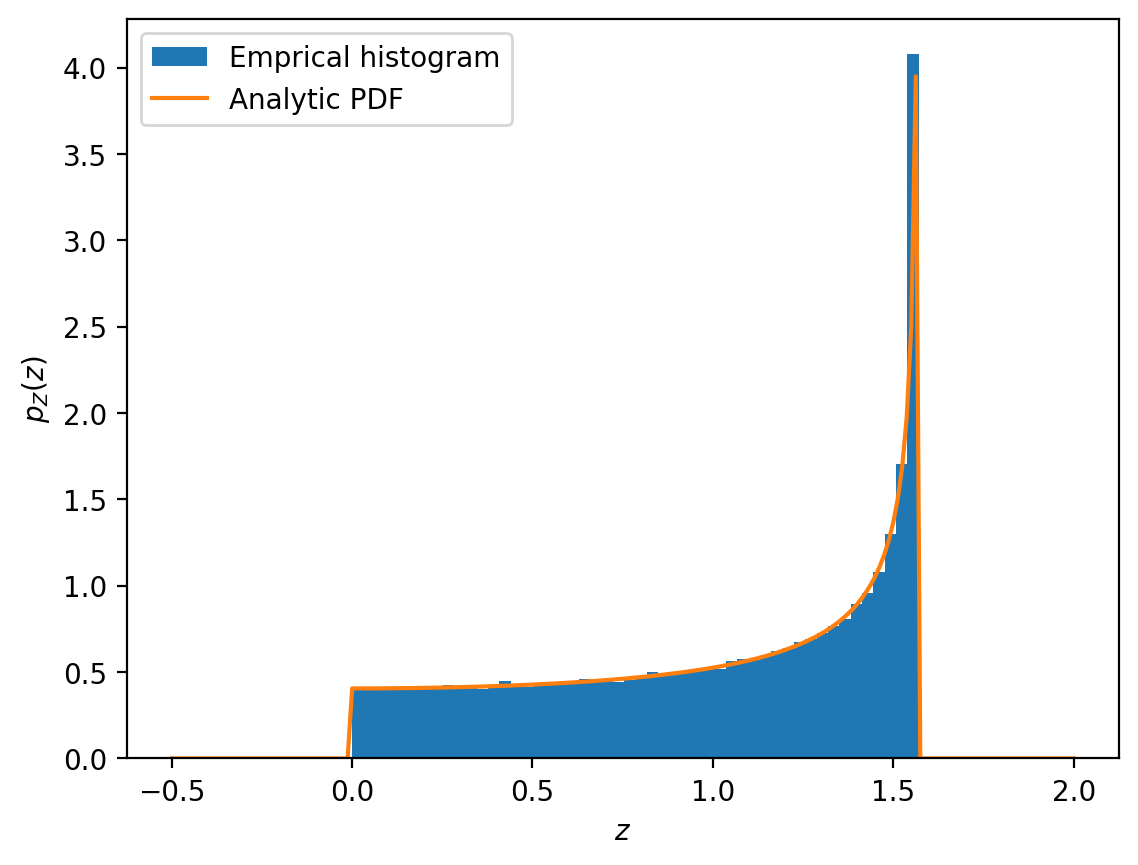

In [27]:
def p_Z(z):
    return np.where((z >= 0) & (z <= np.pi/2), 4/(np.pi * np.sqrt(np.pi**2 - 4*z**2)), 0)

Z = h(np.random.uniform(size=100000))
plt.hist(Z, bins=50, density=True, label='Emprical histogram')

z = np.linspace(-0.5, 2, 201)
plt.plot(z, p_Z(z), label='Analytic PDF')
plt.xlabel(r'$z$')
plt.ylabel(r'$p_Z(z)$')
plt.legend()
plt.show()

# Integration

We will now build on these concepts to derive and visually explore some fundemental properties of numerical integration using the Monte Carlo method.

We'll be working with this simple definite integral:

$$
\begin{align}
F &:= \int_0^\frac{\pi}{2} \sin(x) \dif x.
\end{align}
$$

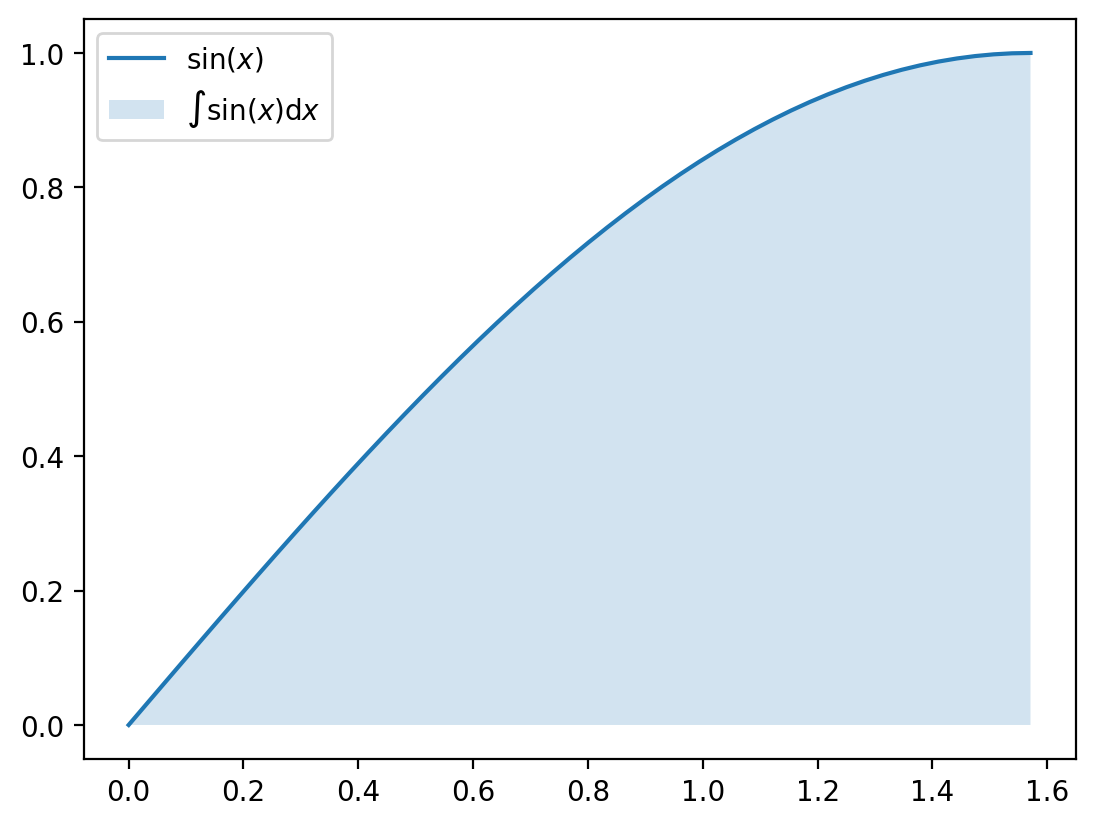

In [28]:
x = np.linspace(0.0, np.pi/2)
f = np.sin(x)

plt.plot(x, f, label=r'$\sin(x)$')
plt.fill_between(x, f, alpha=0.2, label=r'$\int \sin(x) \mathrm{d}x$')
plt.legend()
plt.show()

### Monte Carlo integration

Monte Carlo integration avoids the curse of dimensionality and is therefore a great alternative for high-dimensional problems.

Let's start with a canonical uniform random variable $X \in [0,1]$ and then get mathematical equation for the standard Monte Carlo estimator of this integral using $n$ **uniform** samples (constant PDF) over the integration domain. Thus,
$$
\begin{align}
F_n &= \frac{1}{n}\sum_{i=1}^{n} \frac{f(x_i)}{p_X(x_i)}\\
&=  \frac{1}{n}\sum_{i=1}^{n} \frac{\sin(\frac{\pi}{2}X_i)}{\frac{1}{\frac{\pi}{2}-0}}\\
&=  \frac{\pi}{2 n}\sum_{i=1}^{n} \sin \left(\frac{\pi}{2}X_i \right)\\
\end{align}
$$

#### Visually exploring the Monte Carlo estimator

The code below implements this Monte Carlo estimator. It evaluates the Python function `h(x)` (that we defined previously) $n$ times, for $n \in \{4^1, 4^2, \ldots, 4^{10}\}$, and prints their mean (the estimate $F_n \approx F$), as well as the absolute error ($\vert F_n - F\vert$):

In [73]:
# Monte Carlo integration
print(f'{"n":>11} {"F_n":9} {"|F_n-F|":8}')
for n in 4**np.array([1,2,3,4,5,6,7,8,9,10]):
    x   = np.random.uniform(0, 1, n)
    hx  = h(x)
    sol = np.mean(hx)
    print(f'{n:11d} {sol:+1.6f} {np.abs(sol-1):1.6f}')

          n F_n       |F_n-F| 
          4 +1.053163 0.053163
         16 +1.147865 0.147865
         64 +1.072264 0.072264
        256 +1.005815 0.005815
       1024 +1.018160 0.018160
       4096 +1.003559 0.003559
      16384 +0.997526 0.002474
      65536 +1.001884 0.001884
     262144 +1.001226 0.001226
    1048576 +1.000006 0.000006


The Monte Carlo estimator is clearly an approximation (it is a random variable after all), but the approximation also seems to generally get better as $n$ increases. We visualize this more explicitly in the code below by plotting the estimator $F_n$ as a function of $n$ for increasing values of random samples $n \in [1, 100]$.

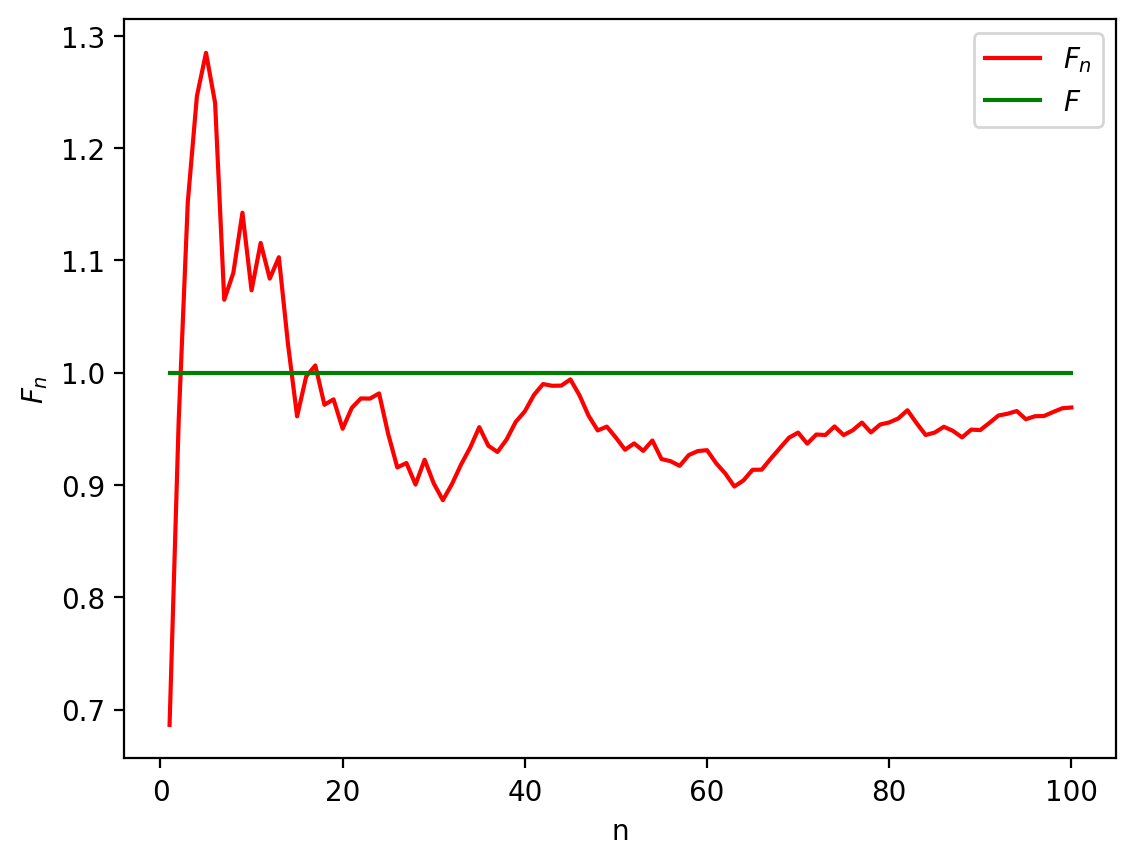

In [75]:
n = 100
x = h(np.random.random(n))
y = 1/np.arange(1, n+1) * np.cumsum(x, axis=0)

plt.plot(np.arange(1, n+1), y, c='r', label=r'$F_n$')
plt.plot(np.arange(1, n+1), np.ones(n), c='g', label=r'$F$')
plt.xlabel(r'n')
plt.ylabel(r'$F_n$')
plt.legend()
plt.show()

By running the above code fragment several times, we see that the trend is for the graph to start off rather chaotic, but, on average, it slowely starts approaching the correct value of $1$ for increasing $n$. Note that the approximation doesn't strictly improve as $n$ increases (it does not monotonically approach $1$, but fluctuates around this value). It is only on average that the error decreases.

One way to visualize this average trend explicitly is by simulating many *replicates* of the Monte Carlo estimator and plotting all the replicates together. The code fragment below runs and plots 1000 such replicates.

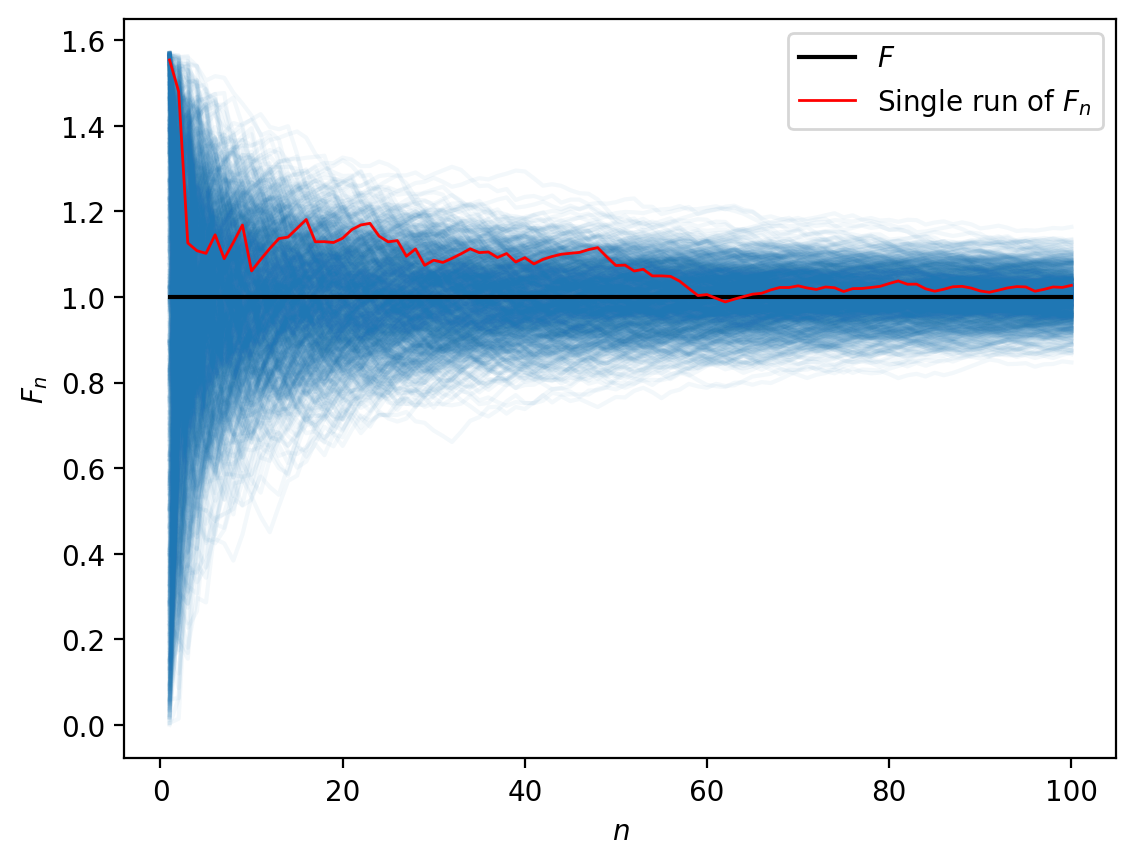

In [78]:
n = 100
runs = 1000

x = h(np.random.random((n, runs)))
y = 1/np.arange(1, n+1)[:, None] * np.cumsum(x, axis=0)

# plot the 1000 independent runs in semitransparent blue
plt.plot(np.arange(1, n+1), y, c="C0", alpha=0.05)
# plot the ground truth value in black
plt.plot(np.arange(1, n+1), np.ones(n), '-k', label=r'$F$')
# highlight a single replicate in red
plt.plot(np.arange(1, n+1), y[:, 0], c='red', linewidth=1, label=r'Single run of $F_n$');
plt.xlabel(r'$n$')
plt.ylabel(r'$F_n$')
plt.legend()
plt.show()

As we can see, the spread of the 1000 replicates starts off large, but the blue cloud of uncertainty around the ground truth value gradually shrinks as $n$ increases.

# Convergence rate of the Monte Carlo estimator

In [31]:
def variance_of_average(n, varZ):
    avg_var = varZ/n
    return avg_var

In [33]:
@interact(n=(1, 20))
def central_limit_theorem(n=1):  # Default parameter is also default slider position
    # given
    mu = 1
    varZ = 0.23
    
    # generate samples, this time a 100000 x n matrix
    X = np.random.uniform(size=(100000,n))
    Z = h(X)
    
    # get mean of elements in each row
    random_means = np.mean(Z, axis=1)
    
    # get the variance of average
    var = variance_of_average(n, varZ)
    sigma = np.sqrt(var)


    # plot the normalized histogram
    plt.figure(figsize=(10, 6))
    _, z, _ = plt.hist(random_means, bins=50, density=True, label='Empirical Histogram')
    plt.plot(z, normal_distr(z, mu, sigma), color = 'red', label = 'Normal Distribution')
    plt.title('Histogram of Averages of {} Z Variables vs. Normal Distribution'.format(n))
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.legend()

    
    # Display the figure
    plt.show()


interactive(children=(IntSlider(value=1, description='n', max=20, min=1), Output()), _dom_classes=('widget-int…

### Observations and Insights

For each value of $n$, the resulting histogram is a visualization of the "spread" of many evaluations of $F_n$ (the *horizontal* blue histogram here corresponds to the *vertical* spread of the blue $F_n$ replicate runs in our previous plot).

By playing around with the slider, we can see that for $n=1$ the distribution of $F_1$ is clearly asymmetric and not normal. Nevertheless, as we increase $n$, the histogram of the average $F_n$ increasingly matches the normal distribution which also becomes increasingly concentrated around the correct answer to our integral $F = 1$.

The visualization and `variance_of_average(n, varZ)` function above indicate that the variance of Monte Carlo integration, $\V{F_n} = \frac{\V{Z}}{n}$, is a function of two things: 1) the number of samples $n$ being averaged, and 2) the variance of a single sample $Z = \frac{f(X)}{p_X(X)}$. This suggests we can reduce error either by increasing $n$, or by drawing our samples $X$ from a distribution $p_X$ that is more "similar to" the integrand $f$, which in turn reduces the variance of $Z$ (a process known as importance sampling which we'll explore next).

Since Monte Carlo variance is $O(n^{-1})$, the error (square root of variance, or *standard deviation*) is hence on the order of $O\left(n^{-\frac{1}{2}}\right)$ for work of $O(n)$. We can demonstrate this convergence rate more explicitly by plotting the standard deviation of $F_n$ on a log-log scale, where a function like $n^{-\frac{1}{2}}$ should look like a straight line with slope $-\frac{1}{2}$.

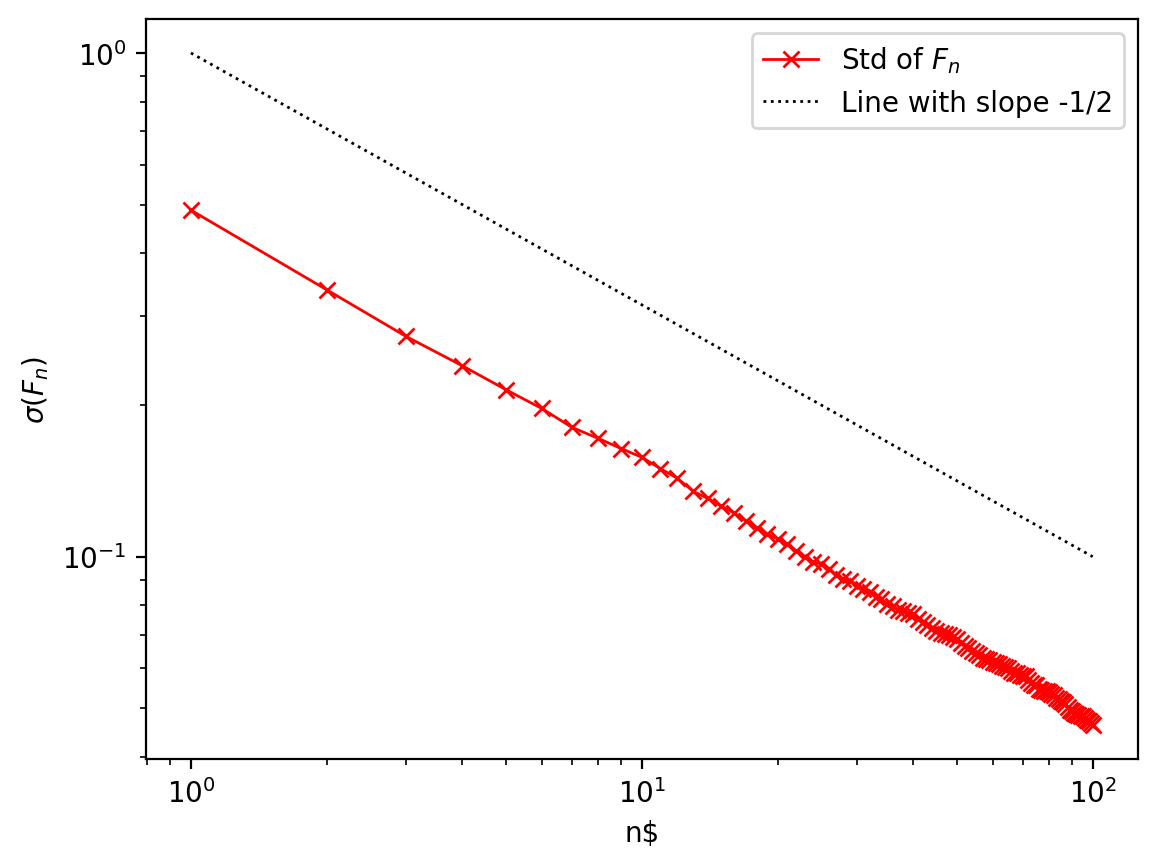

In [34]:
n = 100
runs = 1000

x = h(np.random.random((n, runs)))
y = 1/np.arange(1, n+1)[:, None] * np.cumsum(x, axis=0)

n = np.arange(1, n+1)
plt.loglog(n, np.std(y, axis=1, ddof=1), marker='x', c='red', linewidth=1, label=r'Std of $F_n$');
plt.loglog(n, n**(-0.5), ':k', linewidth=1, label=r'Line with slope -1/2');
plt.legend()
plt.xlabel(r'n$')
plt.ylabel(r'$\sigma(F_n)$')
plt.show()

While for this example we considered a simple $1d$ integral, this convergence rate holds for arbitrarily $d$. Deterministic quadrature, on the other hand, can achieve an error of $O(n^{-2})$ for work on the order of $O(d^n)$. For $d=1$, like our example here, deterministic quadrature's error rate of $O(n^{-2})$ is clearly superior to Monte Carlo's $O(n^{-1/2})$. Monte Carlo is a poor choice for low-dimensional integrals, but as $d$ increases, deterministic quadrature's cost grows exponentially, leading to the curse of dimensionality.

## Importance sampling

To lower the variance, we want a basis for our Monte Carlo estimator that matches the shape of the integrand. Thus define a new function $h^\text{is}(x)$ that takes a uniform random variable $X \in [0,1)$, transforms it to $Y$ with linearly increasing density between $[0, \frac{\pi}{2})$, before passing it to the integrand and dividing by the pdf. Using this new function, the Monte Carlo estimator using importance sampling becomes:

$$
\begin{align}
F_n^\text{is} &= \frac{1}{n}\sum_{i=1}^n h^\text{is}(x_i)\\
&= \frac{1}{n}\sum_{i=1}^n \frac{\sin(y_i)}{\frac{8 y_i}{\pi^2}}.
\end{align}
$$

The Python version of this function `h_is`. Compared to transforming by our original $h$, the histogram when transforming by $h^\text{is}$ is more compact.

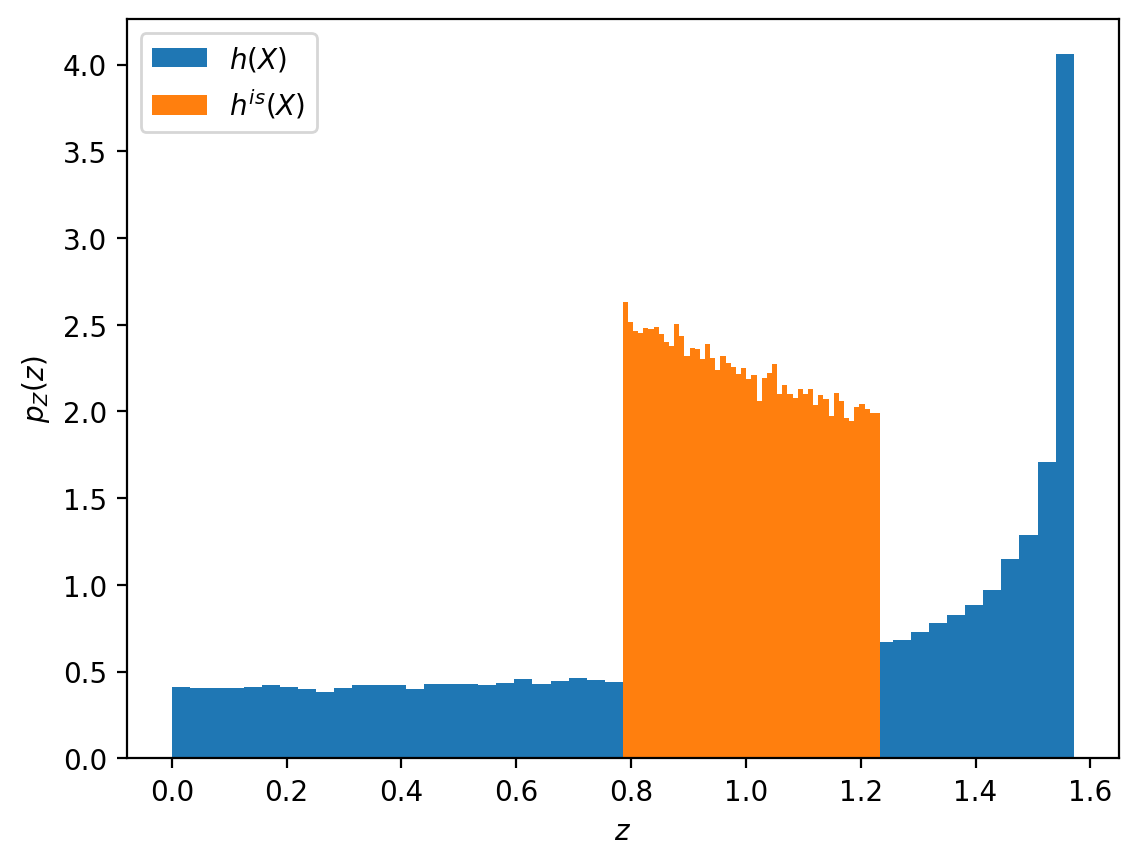

In [93]:
def h_is(x):
    y = np.pi * 0.5 * np.sqrt(x)
    py = 8 * y / np.pi**2
    return np.sin(y) / py

X = np.random.uniform(size=100000)
Z = h(X)
Z_is = h_is(X)

plt.hist(Z, bins=50, density=True, label=r'$h(X)$')
plt.hist(Z_is, bins=50, density=True, label=r'$h^{is}(X)$')
plt.xlabel(r'$z$')
plt.ylabel(r'$p_Z(z)$')
plt.legend()
plt.show()

We can evaluate this estimator $F^\text{is}_n$ for increasing values of $n$ and compare to the original estimator $F_n$:

In [94]:
# Monte Carlo integration
print(f'{"n":>11} {"F_n":9} {"F^is_n":9} {"|F_n-F|":8} {"|F^is_n-F|":8}')
for n in 4**np.array([1,2,3,4,5,6,7,8,9,10]):
    x   = np.random.uniform(0, 1, n)
    h1  = h(x)
    h2  = h_is(x)
    sol1 = np.mean(h1)
    sol2 = np.mean(h2)
    print(f'{n:11d} {sol1:+1.6f} {sol2:+1.6f} {np.abs(sol1-1):1.6f} {np.abs(sol2-1):1.6f}')

          n F_n       F^is_n    |F_n-F|  |F^is_n-F|
          4 +1.215449 +0.961773 0.215449 0.038227
         16 +1.022405 +0.986201 0.022405 0.013799
         64 +1.135713 +0.965615 0.135713 0.034385
        256 +0.967900 +1.007705 0.032100 0.007705
       1024 +0.984832 +1.003907 0.015168 0.003907
       4096 +0.993932 +1.001237 0.006068 0.001237
      16384 +0.993763 +1.001657 0.006237 0.001657
      65536 +0.999273 +1.000202 0.000727 0.000202
     262144 +1.000308 +0.999943 0.000308 0.000057
    1048576 +0.999932 +1.000020 0.000068 0.000020


By comparing 1000 replicates of both $F_n$ and $F^\text{is}_n$, we can see that the importance sampling estimator does indeed seem to hover closer to the correct value of $1$.

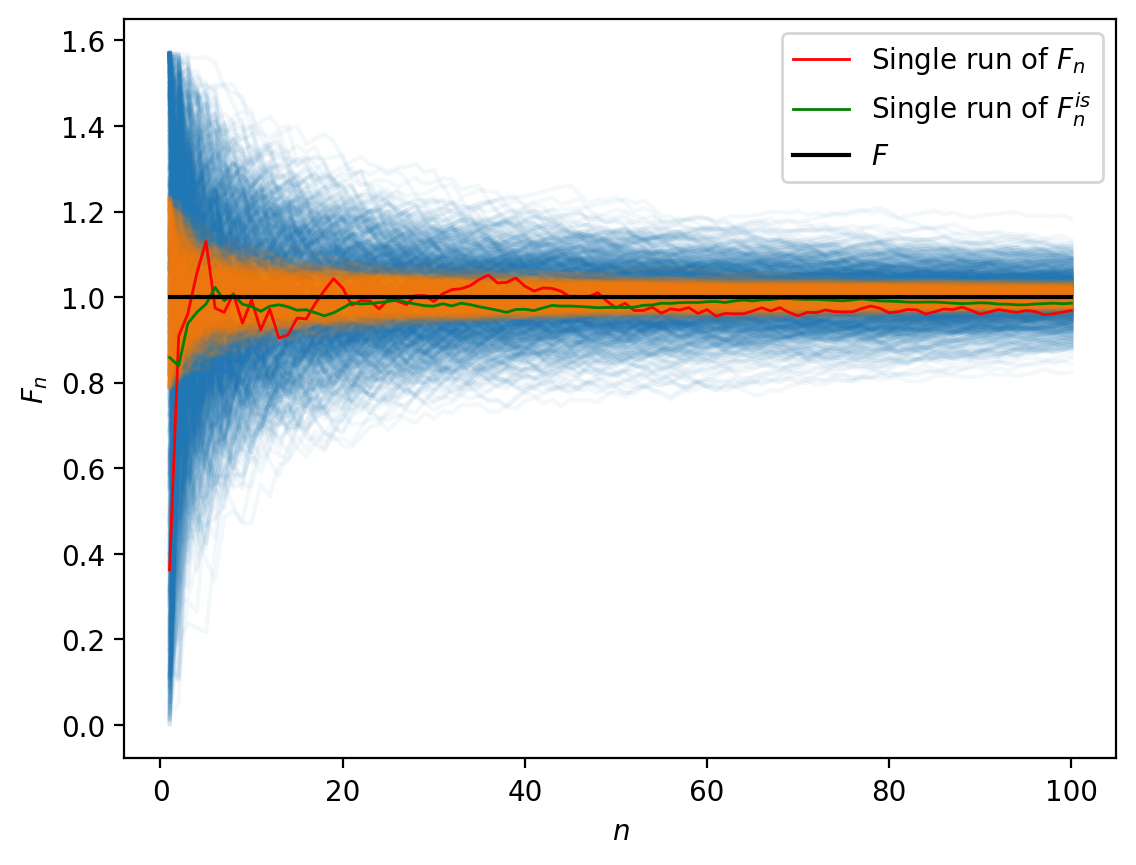

In [95]:
n = 100
runs = 1000

x1 = h(np.random.random((n, runs)))
y1 = 1/np.arange(1, n+1)[:, None] * np.cumsum(x1, axis=0)

x2 = h_is(np.random.random((n, runs)))
y2 = 1/np.arange(1, n+1)[:, None] * np.cumsum(x2, axis=0)

# plot the 1000 independent runs in semitransparent blue and orange
plt.plot(np.arange(1, n+1), y1, c="C0", alpha=0.05)
plt.plot(np.arange(1, n+1), y2, c="C1", alpha=0.05)
# highlight a single replicate in red
plt.plot(np.arange(1, n+1), y1[:, 0], c='red', linewidth=1, label=r'Single run of $F_n$');
plt.plot(np.arange(1, n+1), y2[:, 0], c='green', linewidth=1, label=r'Single run of $F_n^{is}$');
# plot the ground truth value
plt.plot(np.arange(1, n+1), np.ones(n), '-k', label=r'$F$')

plt.xlabel(r'$n$')
plt.ylabel(r'$F_n$')
plt.legend()
plt.show()

And finally, we can compare the histograms of the two estimators and see their respective convergence to the normal distribution.

In [96]:
@interact(n=(1, 20))
def central_limit_theorem_importance_sampling(n=1):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    # Look at the sum of n realizations of sampling many random numbers from any distribution (here uniform)
    x = np.random.uniform(size=(1000, n))
    samples1 = h(x)
    means1 = np.mean(samples1, axis=1)
    samples2 = h_is(x)
    means2 = np.mean(samples2, axis=1)
    
    # Plot normalized histogram & extract the x position of the bins
    _, x1, _ = ax.hist(means1, bins=50, density=True, label=r'Empirical $F_n$')

    # Plot normalized histogram & extract the x position of the bins
    _, x2, _ = ax.hist(means2, bins=50, density=True, label=r'Empirical $F^{is}_n$')
    
    # Estimate parameters for normal distribution
    mu = 1
    sigma2 = variance_of_average(n, 0.23)
    
    # Plot corresponding normal distribution
    y1 = normal_distr(x1, mu, np.sqrt(sigma2))
    ax.plot(x1, y1, linewidth=2, color='red', linestyle='--', label=r'Normal fit to $F_n$')
    
    # Estimate parameters for normal distribution
    sigma2 = variance_of_average(n, 0.016)
    
    # Plot corresponding normal distribution
    y2 = normal_distr(x2, mu, np.sqrt(sigma2))
    ax.plot(x2, y2, linewidth=2, color='green', linestyle='--', label=r'Normal fit to $F^{is}_n$')
    
    ax.set_xlim([-0.5, 2])
    ax.set_ylim([0.0, 10.0])
    
    # Set a title
    ax.set_title(r"Distribution of $F_n$ and $F^{is}_n$")
    
    # Add a legend
    plt.legend(loc='upper left')
    
    # Display the figure
    plt.show()

interactive(children=(IntSlider(value=1, description='n', max=20, min=1), Output()), _dom_classes=('widget-int…

By plotting the variance of $F_n$ and $F^\text{is}_n$ on a log-log plot, we can see that importance sampling doesn't actually change the convergence rate of the estimator, it simply scales the variance (changes the y-intercept on the log-log scale):

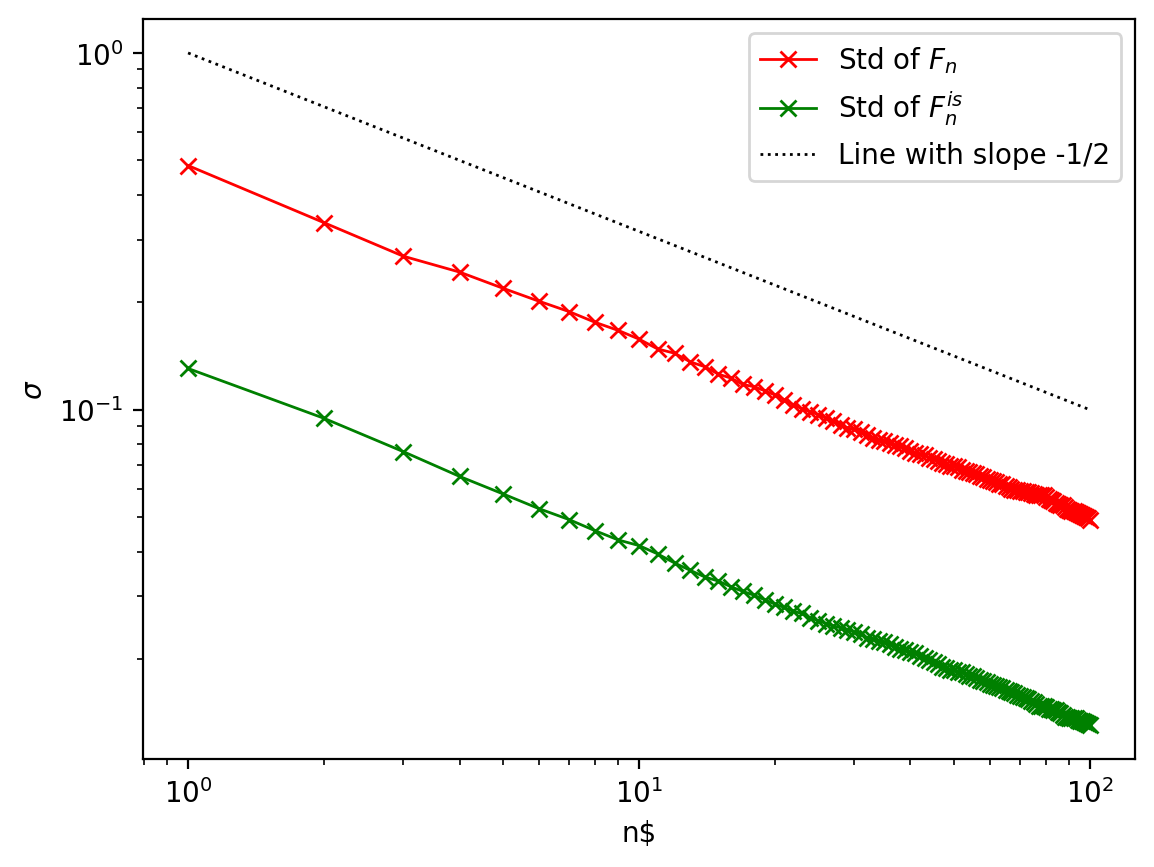

In [97]:
n = 100
runs = 1000

x = np.random.random((n, runs))
h1 = h(x)
y1 = 1/np.arange(1, n+1)[:, None] * np.cumsum(x1, axis=0)

h2 = h_is(x)
y2 = 1/np.arange(1, n+1)[:, None] * np.cumsum(x2, axis=0)

n = np.arange(1, n+1)
plt.loglog(n, np.std(y1, axis=1, ddof=1), marker='x', c='red', linewidth=1, label=r'Std of $F_n$');
plt.loglog(n, np.std(y2, axis=1, ddof=1), marker='x', c='green', linewidth=1, label=r'Std of $F^{is}_n$');
plt.loglog(n, n**(-0.5), ':k', linewidth=1, label=r'Line with slope -1/2');
plt.legend()
plt.xlabel(r'n$')
plt.ylabel(r'$\sigma$')
plt.show()